In [9]:
from utils import *

import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# mdw data
mdw_data = collect_data(airport_code="mdw")
mdw_data = average_by_hour(df=mdw_data)
mdw_data = pd.melt(mdw_data, id_vars="HourRange")
# mdw_data["HourRange"] = list(map(lambda x: x[0:2], mdw_data["HourRange"])) 
mdw_data


,HourRange,variable,value
0,0000 - 0100,TotalPassengerCount,13.000000
1,0800 - 0900,TotalPassengerCount,98.920000
2,0900 - 1000,TotalPassengerCount,220.730263
3,1000 - 1100,TotalPassengerCount,139.568421
4,1100 - 1200,TotalPassengerCount,124.333333
5,1200 - 1300,TotalPassengerCount,123.846154
6,1300 - 1400,TotalPassengerCount,88.428571
7,1400 - 1500,TotalPassengerCount,166.400000
8,1500 - 1600,TotalPassengerCount,64.210526
9,1600 - 1700,TotalPassengerCount,110.198473


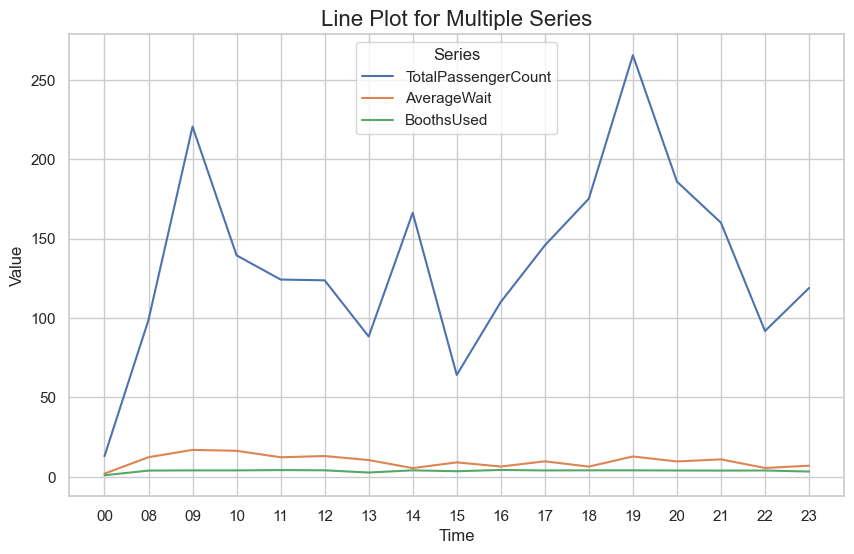

In [12]:
# Create the line plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=mdw_data, x="HourRange", y="value", hue="variable")

# Customize the plot
plt.title("Line Plot for Multiple Series", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend(title="Series")
plt.show()
